In [1]:
!pip install librosa

In [42]:
import wave
import numpy

# Read file to get buffer                                                                                               
ifile = wave.open("tune.wav")
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = numpy.frombuffer(audio, dtype=numpy.int16)
audio_as_np_float32 = audio_as_np_int16.astype(numpy.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16

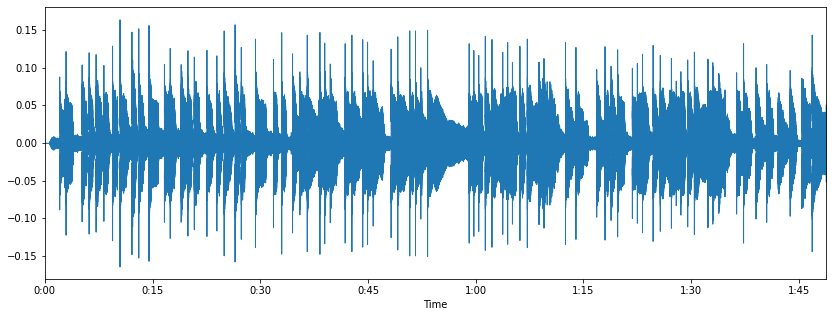

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveplot(audio_normalised, sr=sr)

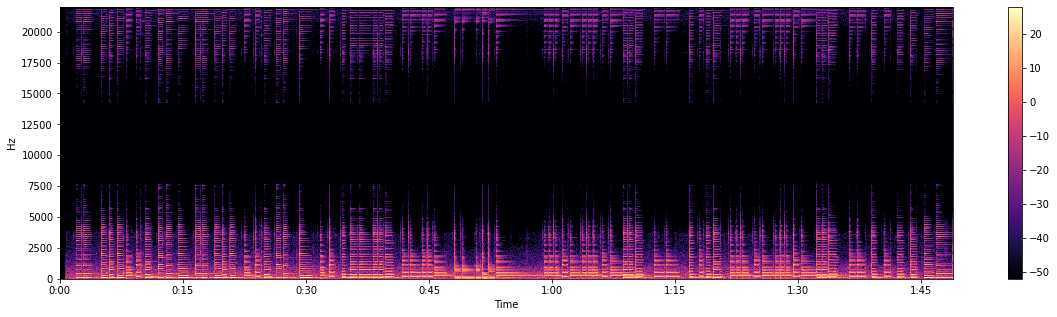

In [44]:
import librosa
X = librosa.stft(audio_normalised)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()